### 간략한 EDA
- Life Expectancy Kaggle 데이터
- 결측치 처리 완료 
- 국가 코드 추가

In [1]:
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
life_url = '../datas/life_expectancy_data_fillna.csv'
life_df = pd.read_csv(life_url, sep=',')
life_df.tail(3)

,CountryCode,ISO3166,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,Region,IncomeGroup
2893,ZWE,716,Zimbabwe,2013,Developing,58.0,399,45.9,6.39,7.11,95.0,0,3.8,36,95,6.88,95,6.8,1.909102e+10,3213972,6.2,6.0,0.488,10.4,Sub-Saharan Africa,Lower middle income
2894,ZWE,716,Zimbabwe,2014,Developing,59.2,371,44.2,6.50,8.13,91.0,0,31.3,34,92,6.44,91,6.3,1.949552e+10,3213972,5.9,5.7,0.498,10.3,Sub-Saharan Africa,Lower middle income
2895,ZWE,716,Zimbabwe,2015,Developing,67.0,336,42.9,6.78,7.45,87.0,0,31.8,32,88,6.70,87,6.2,1.996312e+10,3213972,5.6,5.5,0.507,10.3,Sub-Saharan Africa,Lower middle income


In [3]:
# 결측치 데이터 확인
life_df.isna().sum()

CountryCode                        0
ISO3166                            0
Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
Region                             0
IncomeGroup                        0
dtype: int64

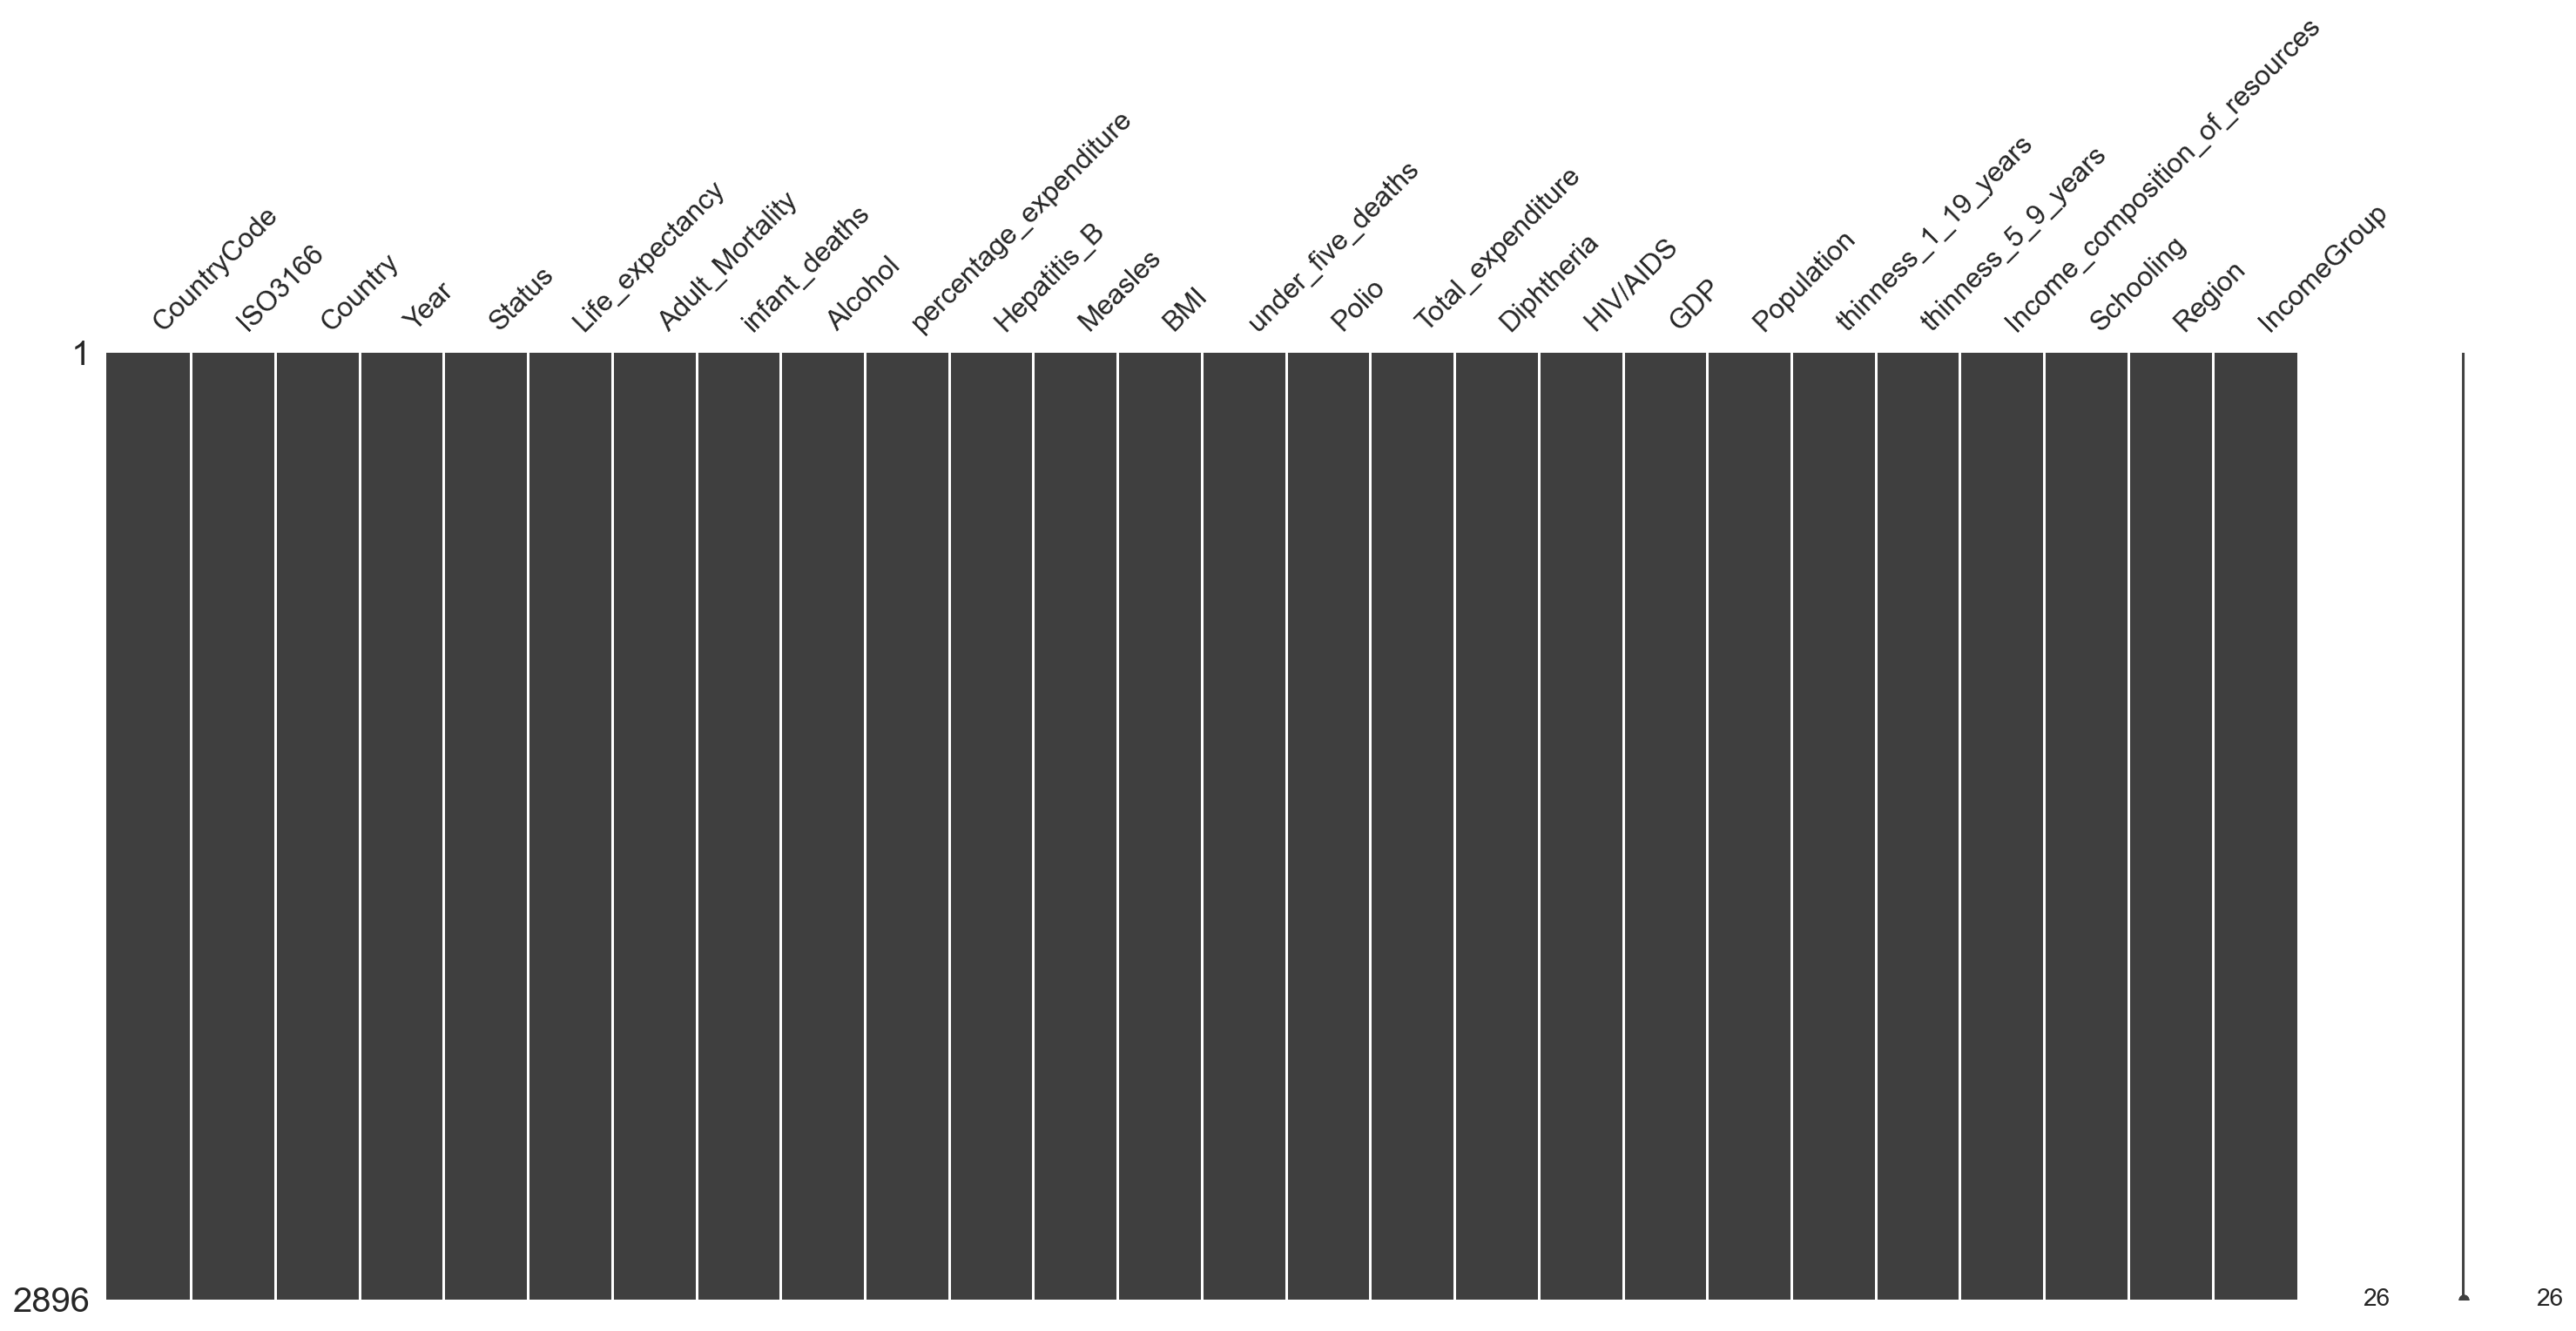

In [4]:
msno.matrix(life_df)
plt.show()

In [5]:
life_df.columns = [cols.upper() for cols in life_df.columns.tolist()]

# Developing: 0, developed: 1
life_df["STATUS"] = [row.replace("Developing","0") for row in life_df["STATUS"].tolist()]
life_df["STATUS"] = [row.replace("Developed","1") for row in life_df["STATUS"].tolist()]
life_df["STATUS"] = [int(row) for row in life_df["STATUS"].tolist()]

life_df.reset_index(drop=True, inplace=True)
life_df.tail(2)

,COUNTRYCODE,ISO3166,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_1_19_YEARS,THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING,REGION,INCOMEGROUP
2894,ZWE,716,Zimbabwe,2014,0,59.2,371,44.2,6.50,8.13,91.0,0,31.3,34,92,6.44,91,6.3,1.949552e+10,3213972,5.9,5.7,0.498,10.3,Sub-Saharan Africa,Lower middle income
2895,ZWE,716,Zimbabwe,2015,0,67.0,336,42.9,6.78,7.45,87.0,0,31.8,32,88,6.70,87,6.2,1.996312e+10,3213972,5.6,5.5,0.507,10.3,Sub-Saharan Africa,Lower middle income


### 다중공선성이 의심되는 컬럼
- Income composition of Resources
- Schooling

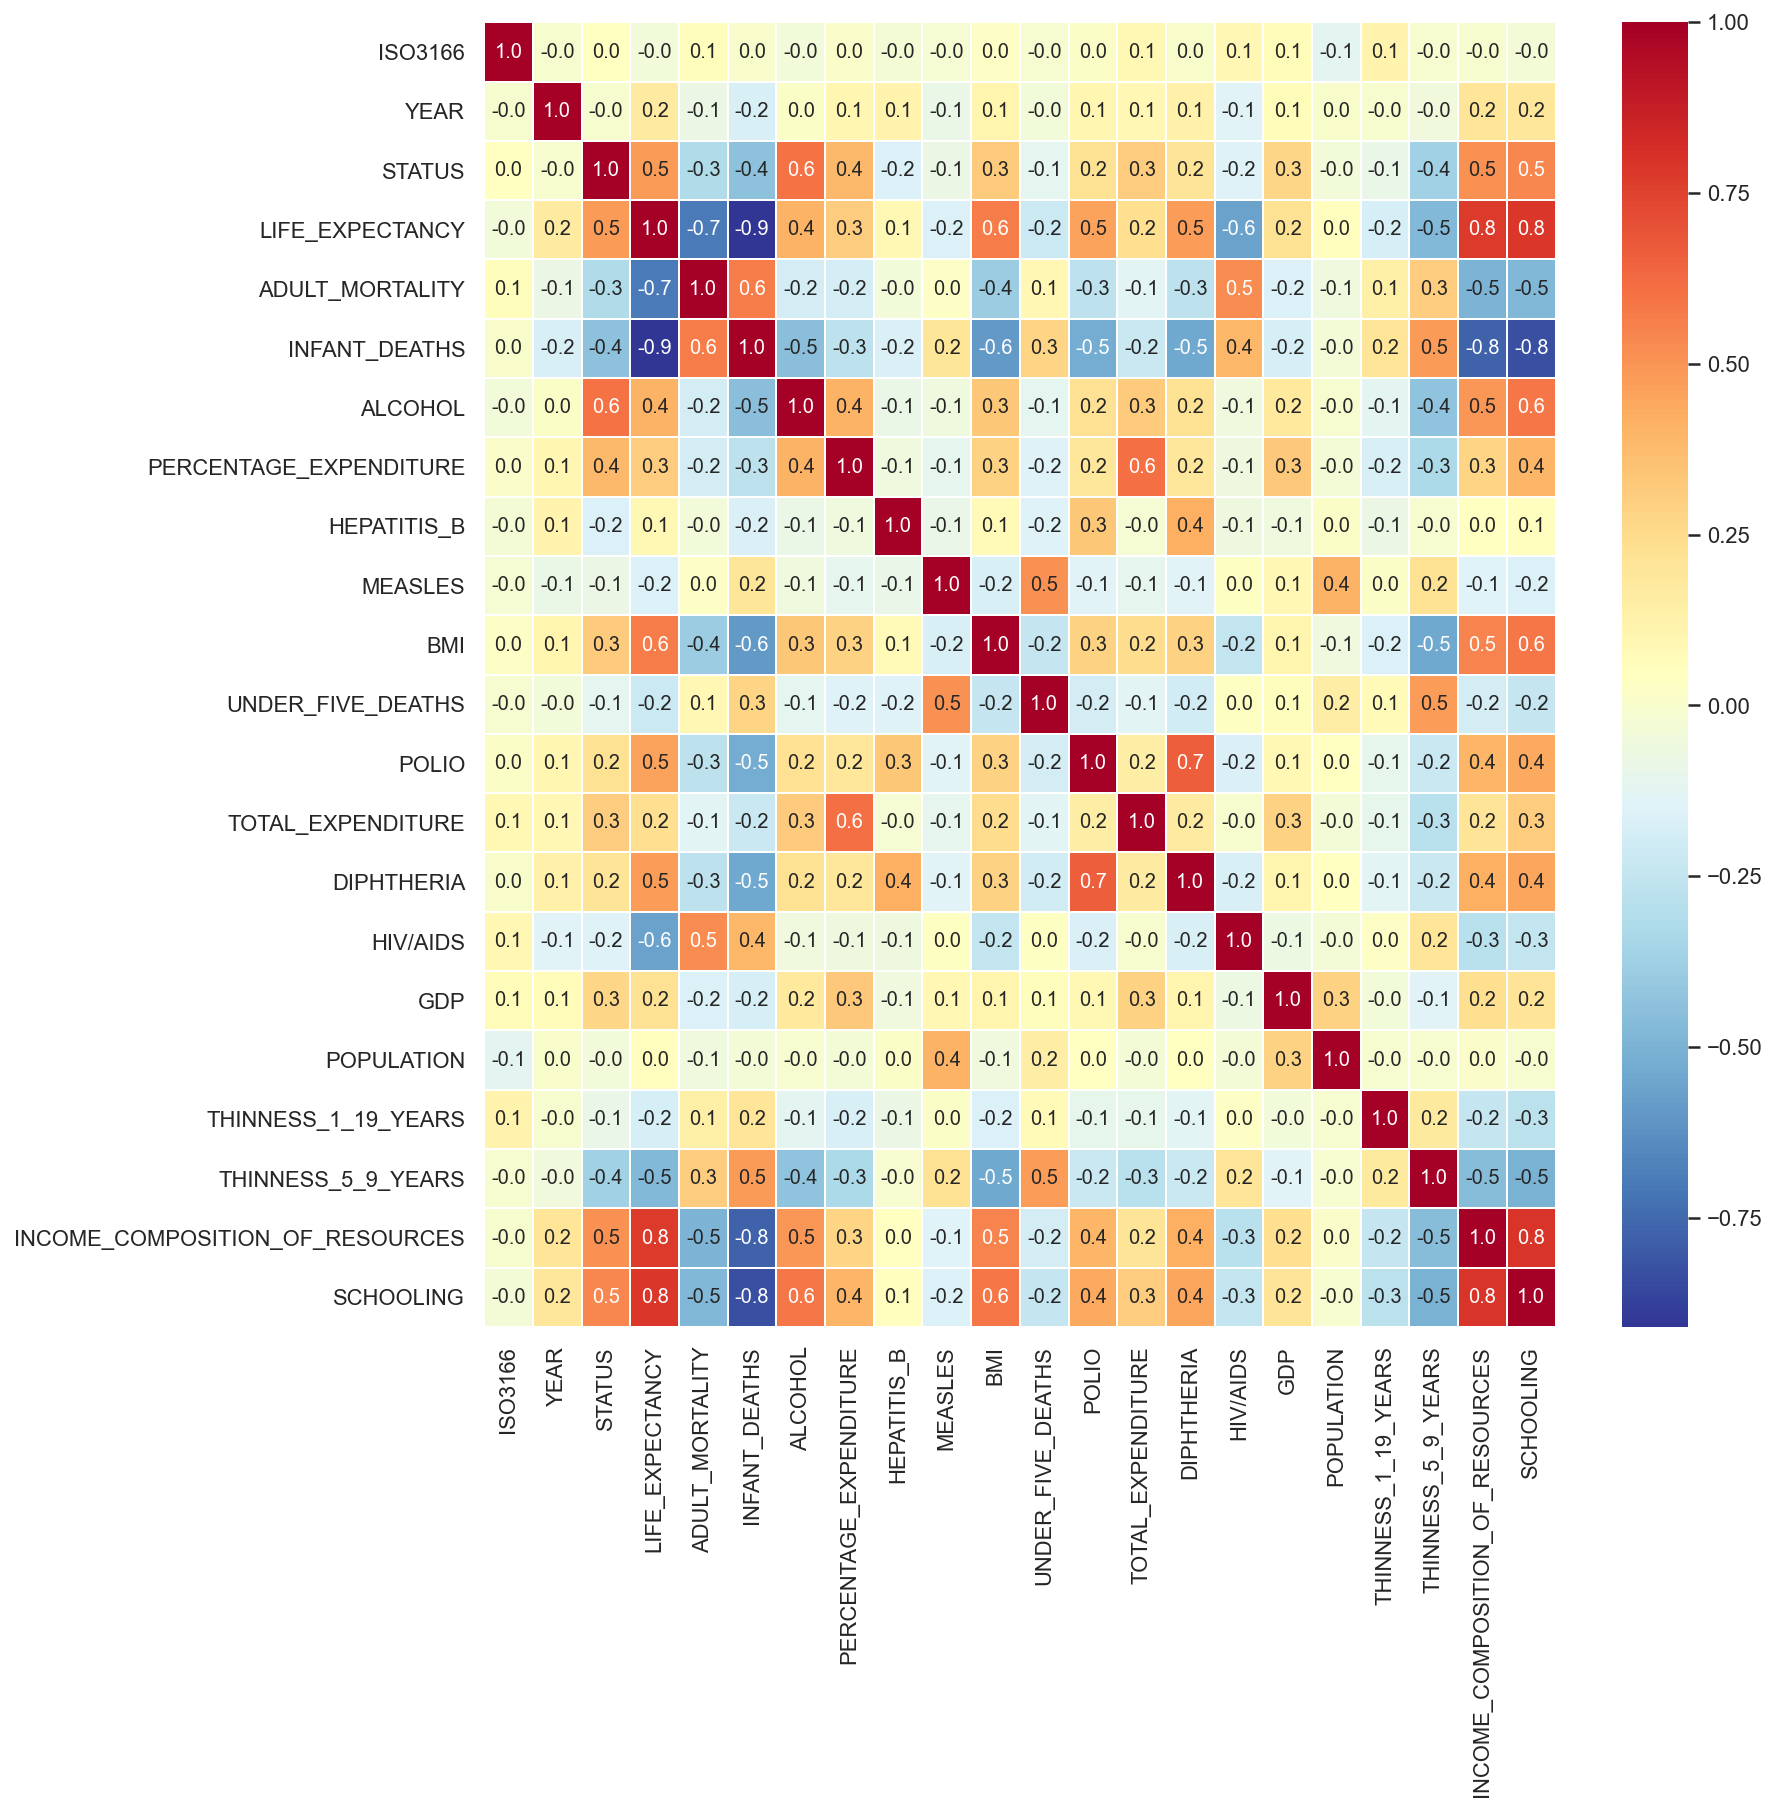

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(life_df.corr(), annot=True, fmt='.1f', linewidths=0.5, cmap='RdYlBu_r');

### Highly Correlated with Life Expectancy 
- Income composition of Resources (0.8)
- Schooling (0.8)
- HIV/AIDS (-0.6)
- Infant Death (-0.9)
- Adult Mortality (-0.7)

In [7]:
mean_df = life_df.groupby(['COUNTRY']).mean().round(3).drop(['YEAR'], axis=1)
mean_df.head(3)

,ISO3166,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_1_19_YEARS,THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.0,0.0,58.194,269.062,70.875,0.014,8.264,64.562,2362.250,15.519,107.562,48.375,8.252,52.312,0.1,1.134344e+10,2.745116e+07,16.581,15.581,0.415,8.212
Albania,8.0,0.0,75.156,45.062,15.250,4.849,5.870,98.000,53.375,49.069,0.938,98.125,5.946,98.062,0.1,9.476655e+09,2.968698e+06,1.619,1.700,0.710,12.137
Algeria,12.0,0.0,73.619,108.188,26.750,0.449,4.634,78.000,1943.875,48.744,23.500,91.750,4.766,91.875,0.1,1.339053e+11,3.482137e+07,6.094,5.975,0.695,12.712


In [12]:
# 상관관계가 높은 feature 선택
cols = ['INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING', 'HIV/AIDS', 'INFANT_DEATHS', 'ADULT_MORTALITY']
lower_cols = [col.lower().capitalize().replace('_', ' ') for col in cols]

fig = make_subplots(rows=5, cols=1, subplot_titles=lower_cols)

for i in range(5):
    hdi_df = mean_df.sort_values(by=cols[i], ascending=False)
    fig.add_trace(go.Bar(x=hdi_df.index, 
                         y=hdi_df[cols[i]], 
                         name=lower_cols[i]), row=i+1, col=1)
    
fig.update_layout(title='Highly Correlated Features - Country', font_color="grey",
                  width=2000, height=1500, template="plotly_white")

fig.show()

In [9]:
# developed / developing 분포
status_df = life_df.groupby(['STATUS']).count()

fig = px.pie(status_df, values='COUNTRY', names=['Developing', 'Developed'])
fig.update_layout(title='선진국 / 개발도상국 분포', font_color="grey", font=dict(size=13))
fig.show()

In [10]:
# region 분포
region_df = life_df.groupby(['REGION']).count()

fig = px.pie(region_df, values='COUNTRY', names=region_df.index.tolist())
fig.update_layout(title='Region별 분포', font_color="grey", font=dict(size=13))
fig.show()

In [13]:
# 상관관계가 높은 feature 선진국 / 개발도상국에 따른 나라별 구분
cols = ['LIFE_EXPECTANCY', 'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING', 'HIV/AIDS', 'INFANT_DEATHS', 'ADULT_MORTALITY']
lower_cols = [col.lower().capitalize().replace('_', ' ') for col in cols]
colors = ['Burg', 'Darkmint', 'Purp', 'Redor', 'Teal', 'Magenta']

for i in range(5):
    hdi_df = mean_df.sort_values(by=cols[i], ascending=False)

    fig = px.bar(hdi_df, x=hdi_df.index, y=hdi_df[cols[i]], color=hdi_df['STATUS'],
                barmode='group', color_continuous_scale=colors[i])

    fig.update_layout(
        title_text=lower_cols[i],
        height=500,
        width=1300,
        template='plotly_white',
        font_color='grey'
    )
    
    fig.show()

In [14]:
# region to Integer
region = {'South Asia': 0, 'Europe & Central Asia': 1, 
          'Middle East & North Africa': 2, 'Sub-Saharan Africa': 3,
          'Latin America & Caribbean': 4, 'East Asia & Pacific': 5, 'North America': 6}

life_df = life_df.drop(['COUNTRYCODE'], axis=1)
life_df = life_df.replace({'REGION': region})

# region별 dataframe 선언
regions_df = [pd.DataFrame(data=life_df[life_df['REGION'] == i]) for i in range(len(region))]

# region별 연도에 따라 groupby
year_df = [regions_df[i].groupby('YEAR').mean().drop(['REGION', 'ISO3166', 'STATUS'], axis=1)
                for i in range(len(region))]


In [15]:
# 대분류 카테고리별
# Measles는 어디에 속해야?
cat = {'economy': ['PERCENTAGE_EXPENDITURE', 'TOTAL_EXPENDITURE', 'GDP', 'POPULATION'],
        'death_rate': ['INFANT_DEATHS', "ADULT_MORTALITY",'UNDER_FIVE_DEATHS','THINNESS_1_19_YEARS','THINNESS_5_9_YEARS', 'HIV/AIDS'],
        'vaccine': ['HEPATITIS_B','POLIO','DIPHTHERIA'],
        'others':['SCHOOLING','INCOME_COMPOSITION_OF_RESOURCES', 'BMI', 'ALCOHOL']}